In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import defaultdict, Counter
import nltk
from nltk.corpus import brown
from nltk import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
import math
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['embeddings', 'train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
#importing the data
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)

Train shape :  (1306122, 3)
Test shape :  (56370, 2)


In [3]:
#display top 5 rows
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
test_df.head()

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?


In [5]:
#structure of the dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [6]:
#structure of the dataframe
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56370 entries, 0 to 56369
Data columns (total 2 columns):
qid              56370 non-null object
question_text    56370 non-null object
dtypes: object(2)
memory usage: 880.9+ KB


There are no missing values in both the datasets.

## Data Exploration

#### What is the class distribution?


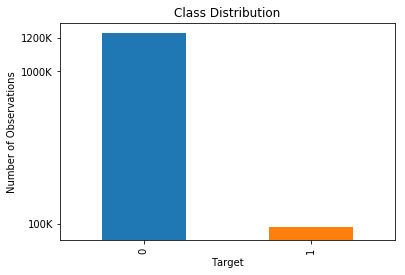

In [7]:
train_df['target'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.yticks([100000,1000000,1200000],['100K','1000K','1200K'])
plt.ylabel("Number of Observations")
plt.xlabel("Target")
plt.show()

In [8]:
train_df['target'].value_counts(normalize=True) * 100

0    93.812982
1     6.187018
Name: target, dtype: float64

From the plot, we can say that there are almost 93.8% of quora questions are sincere (target=0) and 6.2% of quora questions are insincere (target=1)

#### What are the most frequent words in both of the classes?

#### For Sincere Questions:

In [9]:
sincere_df = train_df[train_df['target']==0]

#### Unigram

In [10]:
#creating a dictionary with words and their counts
dist = defaultdict(int)
for question in sincere_df["question_text"]:
    #creating an object for further generating unigrams, bigrams etc.
    question = question.lower()
    tokens = nltk.word_tokenize(question)
    tokens = [token for token in tokens if token.isalpha() if token not in stop_words]
    for word in tokens:
        dist[word] += 1

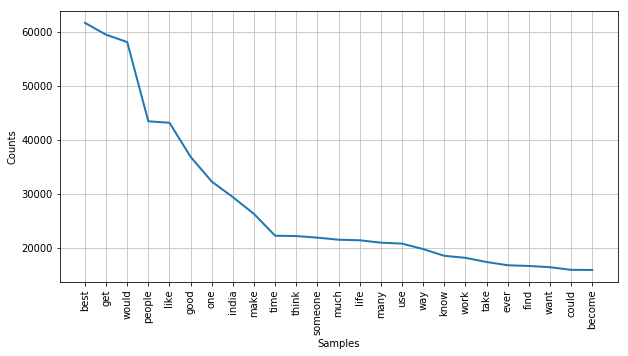

In [11]:
#distribution plot of most frequent top 25 words
freqdist = nltk.FreqDist(dist)
plt.figure(figsize=(10,5))
freqdist.plot(25)

#### Bigram

In [12]:
#creating a dictionary with words and their counts
dist = defaultdict(int)
for question in sincere_df["question_text"]:
    #creating an object for further generating unigrams, bigrams etc.
    question = question.lower()
    tokens = nltk.word_tokenize(question)
    tokens = [token for token in tokens if token.isalpha() if token not in stop_words]
    bigrams = ngrams(tokens,2)
    for word in bigrams:
        dist[word] += 1

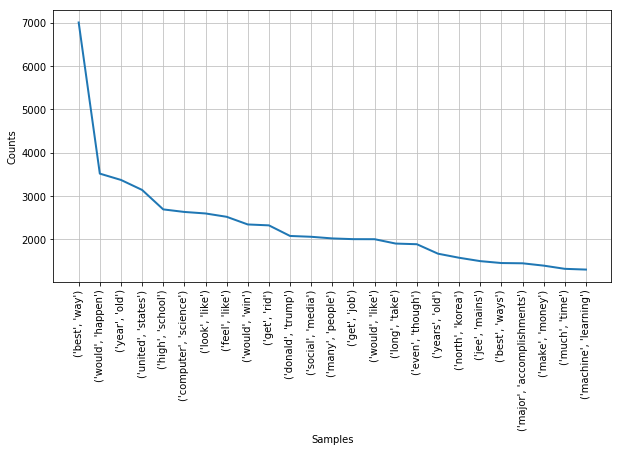

In [13]:
#distribution plot of most frequent top 25 words
freqdist = nltk.FreqDist(dist)
plt.figure(figsize=(10,5))
freqdist.plot(25)

#### For Insincere Questions:

In [14]:
insincere_df = train_df[train_df['target']==1]

#### Unigram

In [15]:
#creating a dictionary with words and their counts
dist = defaultdict(int)
for question in insincere_df["question_text"]:
    #creating an object for further generating unigrams, bigrams etc.
    question = question.lower()
    tokens = nltk.word_tokenize(question)
    tokens = [token for token in tokens if token.isalpha() if token not in stop_words]
    for word in tokens:
        dist[word] += 1

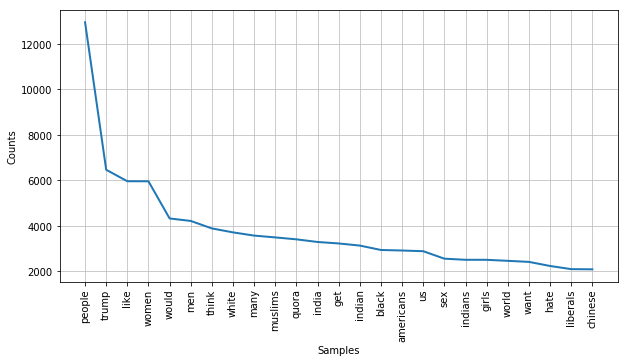

In [16]:
#distribution plot of most frequent top 25 words
freqdist = nltk.FreqDist(dist)
plt.figure(figsize=(10,5))
freqdist.plot(25)

#### Bigram

In [17]:
#creating a dictionary with words and their counts
dist = defaultdict(int)
for question in insincere_df["question_text"]:
    #creating an object for further generating unigrams, bigrams etc.
    question = question.lower()
    tokens = nltk.word_tokenize(question)
    tokens = [token for token in tokens if token.isalpha() if token not in stop_words]
    bigrams = ngrams(tokens,2)
    for word in bigrams:
        dist[word] += 1

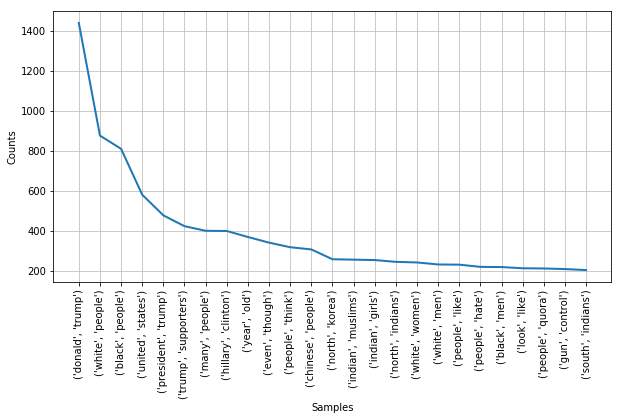

In [18]:
#distribution plot of most frequent top 25 words
freqdist = nltk.FreqDist(dist)
plt.figure(figsize=(10,5))
freqdist.plot(25)

#### What is the word distribution across the questions?

In [ ]:
#Number of words in the text
train_df["words#"] = train_df["question_text"].apply(lambda x: len(str(x).split()))
test_df["words#"] = test_df["question_text"].apply(lambda x: len(str(x).split()))

In [ ]:
#seaborn boxplot
sns.set_style("whitegrid")
ax = sns.boxplot(x="words#", y="target", hue="target",              
data=train_df, orient="h",palette="Set3")

#### What is the unique word distribution across the questions?

In [ ]:
#Number of unique words in the text
train_df["unique_words#"] = train_df["question_text"].apply(lambda x: len(set(str(x).split())))
test_df["unique_words#"] = test_df["question_text"].apply(lambda x: len(str(x).split()))

In [ ]:
#seaborn boxplot
sns.set_style("whitegrid")
ax = sns.boxplot(x="unique_words#", y="target", hue="target",              
data=train_df, orient="h", palette="Set3")